<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-входных-данных" data-toc-modified-id="Анализ-входных-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ входных данных</a></span></li><li><span><a href="#Исследовательский-анализ-входных-данных" data-toc-modified-id="Исследовательский-анализ-входных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ входных данных</a></span></li><li><span><a href="#Код-для-выгрузки-данных-в-csv-формат" data-toc-modified-id="Код-для-выгрузки-данных-в-csv-формат-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Код для выгрузки данных в csv формат</a></span></li><li><span><a href="#Cсылка-на-дашборд-Tableau" data-toc-modified-id="Cсылка-на-дашборд-Tableau-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cсылка на дашборд Tableau</a></span></li></ul></div>

# Дашборд для Яндекс.Дзен

Яндекс.Дзене.
Анализ пользовательского взаимодействия с карточками статей.
Каждую карточку определяют её тема и источник (у него тоже есть тема).
Пользователей системы характеризует возрастная категория. 
Есть три способа взаимодействия пользователей с системой:

    Карточка отображена для пользователя (show);
    Пользователь кликнул на карточку (click);
    Пользователь просмотрел статью карточки (view).
    
Провести процесс автоматизации:
Дашборд будет основываться на пайплайне, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу.

In [2]:
pip install psycopg2-binary 

Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 

import numpy 

In [15]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

query= ''' SELECT * 
      FROM dash_visits
      '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

In [16]:
dash_visits

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


Спецификация данных:   
  - record_id - уникальный идентификатор пользователя
  - item_topic- тема карточек
  - source_topic - источник карточек
  - age_segment - возрастная категория пользователей
  - dt - время посещения 
  - visits - количество визитов

## Анализ входных данных

In [24]:
display(dash_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


None

Объем данных - 1.4 MB. Типы данных соответствуют действительности. 

In [23]:
display(dash_visits.isnull().sum())

record_id       0
item_topic      0
source_topic    0
age_segment     0
dt              0
visits          0
dtype: int64

Пропущенных значений нет.

In [25]:
dash_visits.duplicated().sum()

0

В наших данных не выявлены явные дубликаты.

## Исследовательский анализ входных данных

In [64]:
# статистические показатели по идентификатору пользователей
dash_visits['record_id'].describe()

count    3.074500e+04
mean     1.055969e+06
std      8.875461e+03
min      1.040597e+06
25%      1.048283e+06
50%      1.055969e+06
75%      1.063655e+06
max      1.071341e+06
Name: record_id, dtype: float64

In [69]:
dash_visits['record_id'].nunique()

30745

Количество строк в датарейме совпадает с количеством уникальных пользователей. Все пользователи уникальны.

In [53]:
#максимальная и минимальная дата посещения пользователя

print('Минимальная дата посещения пользователей',dash_visits.dt.min())
print('Максимальная дата посещения пользователей',dash_visits.dt.max())

Минимальная дата посещения пользователей 2019-09-24 18:28:00
Максимальная дата посещения пользователей 2019-09-24 19:00:00


Период входных данных - **24 сентября 2019 18:28-19:00**

In [28]:
#cтатистические показатели по визитам пользователей 
dash_visits['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

В среднем количество визитов пользователей равно 10. 
Рассмотрим гистрограмму распределения пользователей


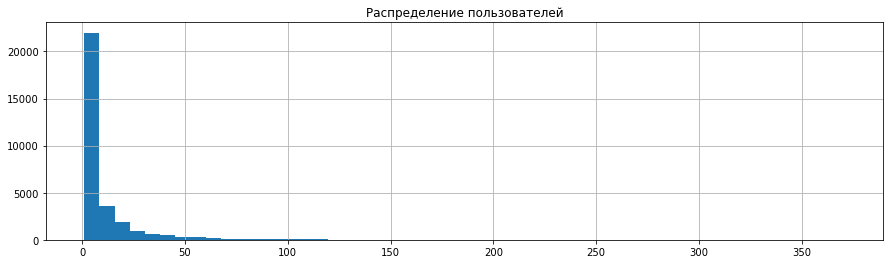

In [42]:
dash_visits['visits'].hist(bins=50, figsize=(15,4))
plt.title ('Распределение пользователей');

В целом распределение неравномерное , присутствуют выбросы .Максимальное значение визитов - 371 -явный выброс.

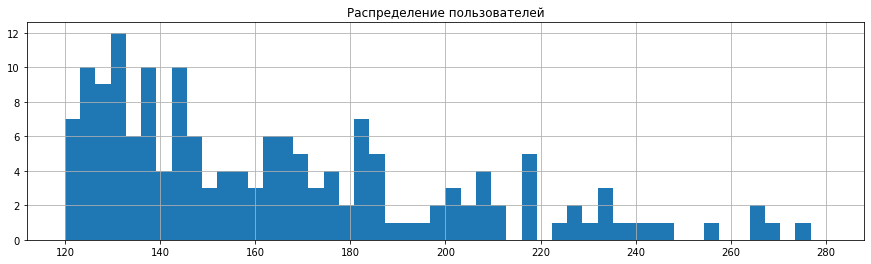

In [44]:
dash_visits['visits'].hist(bins=50, figsize=(15,4),range=(120,280))
plt.title ('Распределение пользователей');

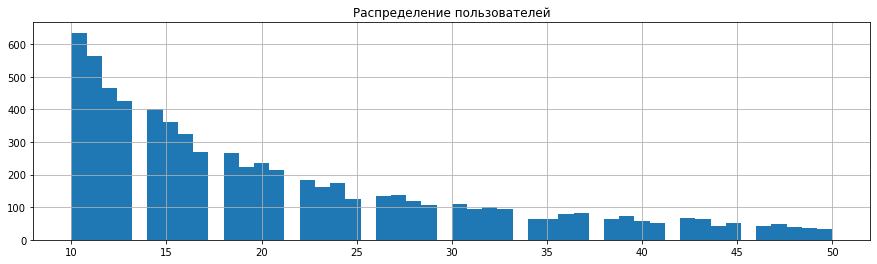

In [49]:
dash_visits['visits'].hist(bins=50, figsize=(15,4), range=(10,50))
plt.title ('Распределение пользователей');

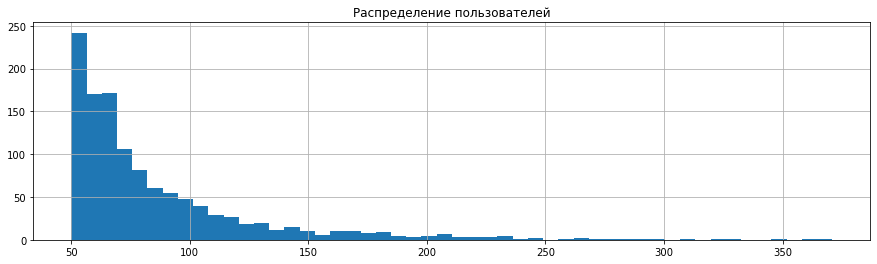

In [45]:
dash_visits['visits'].hist(bins=50, figsize=(15,4),range=(50,371))
plt.title ('Распределение пользователей');

Есть большие значения (выбросы) до 371,их подавляет большинство значений расположено от от 10 до 50

In [54]:
#уникальные значения по темам
dash_visits['source_topic'].unique()

array(['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия',
       'Ремонт', 'Россия', 'Сад и дача', 'Сделай сам',
       'Семейные отношения', 'Семья', 'Спорт', 'Строительство',
       'Технологии', 'Финансы'], dtype=object)

Всего **26** уникальных тем

In [61]:
# уникальные категории пользователей в разбивке на возрастные группы
dash_visits['age_segment'].unique()

array(['18-25', '26-30', '31-35', '36-40', '41-45', '45+'], dtype=object)

Всего 6 категорий по возрастным группам пользователей:

    - 18-25
    - 26-30
    - 31-35
    - 36-40
    - 45+   

In [62]:
# уникальные категории пользователей в разбивке на возрастные группы
dash_visits['item_topic'].unique()

array(['Деньги', 'Дети', 'Женская психология', 'Женщины', 'Здоровье',
       'Знаменитости', 'Интересные факты', 'Искусство', 'История',
       'Красота', 'Культура', 'Наука', 'Общество', 'Отношения',
       'Подборки', 'Полезные советы', 'Психология', 'Путешествия',
       'Рассказы', 'Россия', 'Семья', 'Скандалы', 'Туризм', 'Шоу', 'Юмор'],
      dtype=object)

In [78]:
#группировка входных данных по категориям
for i in ['item_topic','source_topic','age_segment']:
    print(dash_visits[i].value_counts())
    print()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1

Входные данные изучены и рекомендованы для дальнейшего анализа

## Код для выгрузки данных в csv формат 

In [7]:
#код для выгрузки данных в файл csv

dash_visits.to_csv('dash_visits.csv', index=False)

In [14]:
#контрольная проверка 
#df=pd.read_csv ('C://Users//vdavy//Desktop//Dataset_csv_ipynb//Project_auto//dash_visits.csv')
#display(df)

## Cсылка на дашборд Tableau 

https://public.tableau.com/app/profile/vika3251/viz/yandex_dzen_16525371289070/Dashboard1?publish=yes